# Train all SVM predictors

In [8]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import warnings
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit, StratifiedKFold
from IPython.display import display
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader2 import ProfileReader
from scripts.svm_tools import plot_learning_curve, grid_search_svm, RS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

pd.options.display.max_rows = 30
pd.options.display.max_columns = 300
import matplotlib.pyplot as plt
%matplotlib inline

pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')

# read in data.
data = pr.get_profile(index=['mech'])
mc = pr.get_mechanism_count()

mechs = pr.get_mechanisms()

In [9]:
#mc

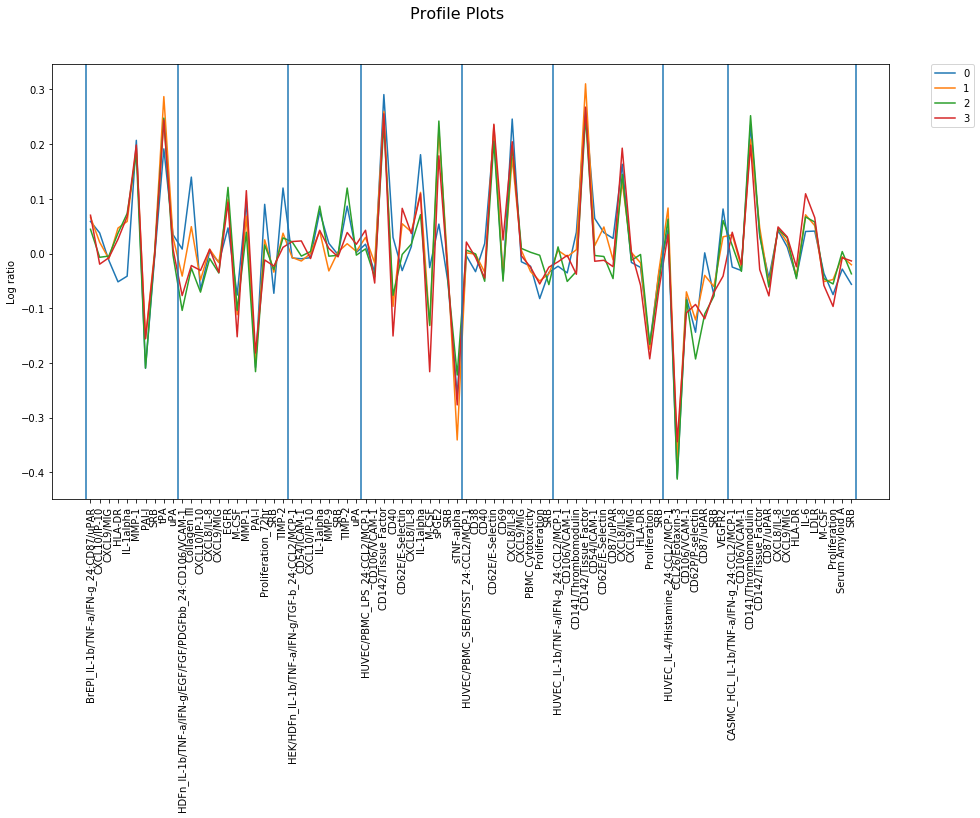

In [10]:
# print out the original positive class AhR Agonist
mech = 'AhR agonist'
X, y = pr.get_x_y(mech=mech, impute='group_mean', normalize='l2', prof_num=50)
Counter(y)  
xc = X.columns
pr.plot(X[:4])

[(0, 50), (1, 50)]


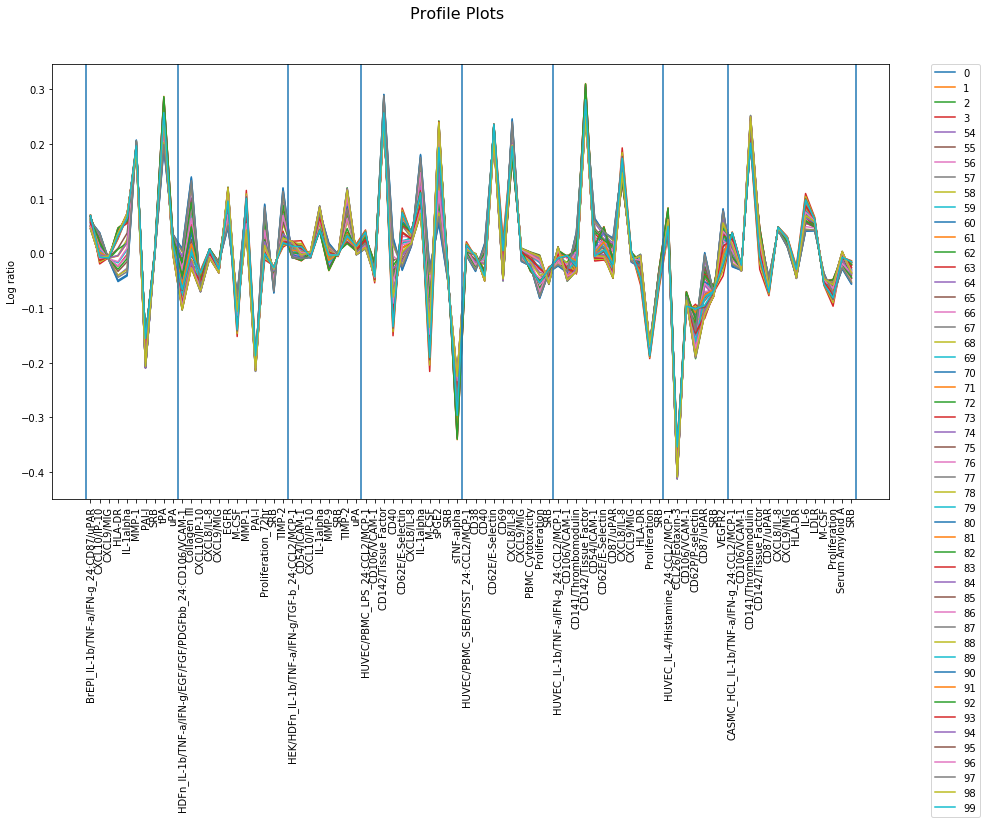

In [11]:
# Synthetic Minority Oversampling Technique. Bring the positive class numbers up to the random negative class.
k_n = min(Counter(y)[1]-1 ,5)
X, y = SMOTE(k_neighbors=k_n, kind='regular').fit_sample(X, y)
print(sorted(Counter(y).items()))
X=pd.DataFrame(X, columns=xc)
pr.plot(X[y==True])

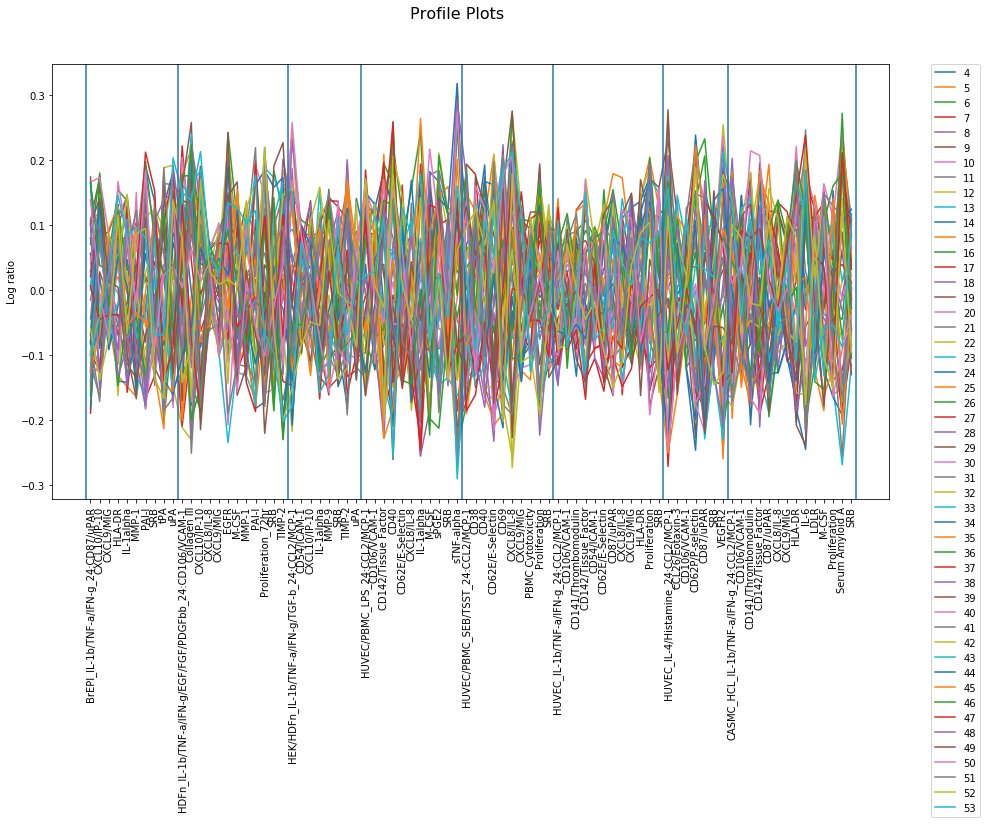

In [12]:
# Plot the random class
pr.plot(X[y==False])

In [13]:
clfs = {}

# ensure reprodicible results
np.random.seed(442)
for mech in mechs:
     
    # get training data with 100 negative class
    X, y = pr.get_x_y(mech=mech, impute='group_mean', normalize='l2', prof_num=50)

    # Synthetic Minority Oversampling Technique. Bring the positive class numbers up to the random negative class.
    k_n = min(Counter(y)[1]-1 ,5)
    X, y = SMOTE(k_neighbors=k_n, kind='regular').fit_sample(X, y)

    best_clf = grid_search_svm(X, y, scorer=precision_score, parameters={'C': [500]})
    clfs.update({mech: best_clf})